In [1]:
#add citation https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.mixture import GaussianMixture
from Util import loadBeer,loadWine,loadBeerRaw
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import time
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [3]:
X_train, X_test, y_train, y_test= loadBeerRaw()
pca = PCA(n_components=3)
encoder = LabelEncoder()
X_train['SugarScale'] = encoder.fit_transform(X_train['SugarScale']).astype(np.int32)
principalComponents =pca.fit_transform(X_train[['OG','FG','ABV','IBU','Color','BoilSize','BoilTime','Efficiency','SugarScale']])

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3'])
gmm = GaussianMixture(n_components=10)
gmm.fit(principalDf)
y_gmm = gmm.predict(principalDf)

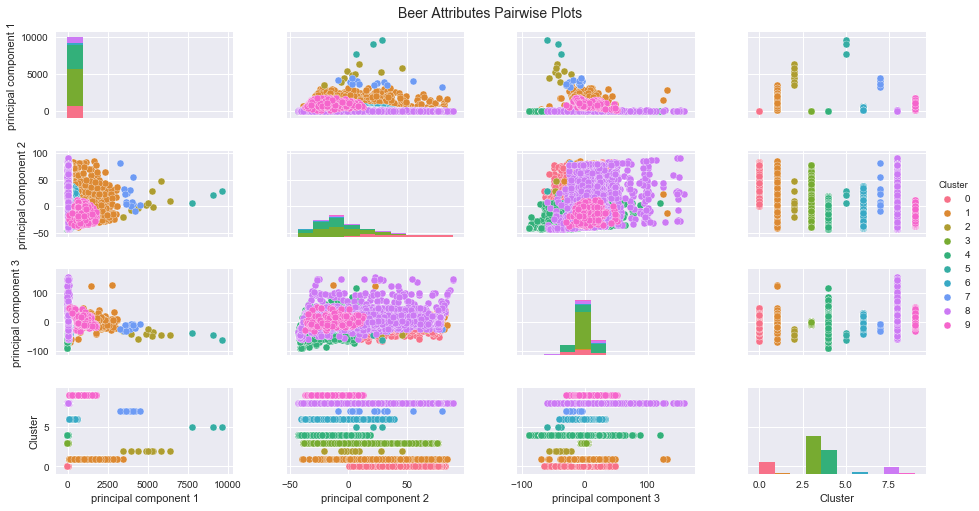

In [5]:
principalDf['Cluster'] =y_gmm
pp = sns.pairplot(principalDf, hue='Cluster', size=1.8, aspect=1.8)
fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Beer Attributes Pairwise Plots', fontsize=14)